In [1]:
parag_windows = 'C:\\Users\\parag\\Dropbox (Personal)\\sub_lot_paper\\source_code\\'
parag_mac = '/Users/paragsiddique/LoDI Dropbox/sub_lot_paper/source_code/'
import sys
sys.path.append(parag_windows)

In [2]:
from parking_env.parking_lot import *
from parking_env.sub_lot import *
from parking_env.traditional_lot import *
from parking_env.retrieval_algorithms import *
from parking_env.sub_lot_utils import *
from parking_env.utils import *
from parking_env.sub_lot_cost_function import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


## Step 01
Compute width and length of a traditional parking lot with parking capacity $N_{t}$, and shape $r$, where
$r = \frac{W}{L}$ .

In [4]:
no_of_cars_initial_guess = 1634
initial_shape = 1

In [5]:
width, length, no_of_cars = compute_width_length(no_of_cars_initial_guess, initial_shape)
print('width ', width)
print('length ', length)
print('no_of_cars ', no_of_cars)

width  594
length  630
no_of_cars  1472


## Step 02
Compute width and length of various shapes (0.0 to 2.0) of parking lot keeping the area ($L \cdot W$) same
as in step 1.

In [6]:
new_shape = compute_shapes(width, length)
print(new_shape)

{0.1: (193, 1934), 0.2: (273, 1367), 0.3: (335, 1116), 0.4: (386, 967), 0.5: (432, 865), 0.6: (473, 789), 0.7: (511, 731), 0.8: (547, 683), 0.9: (580, 644), 1.0: (611, 611), 1.1: (641, 583), 1.2: (670, 558), 1.3: (697, 536), 1.4: (723, 517), 1.5: (749, 499), 1.6: (773, 483), 1.7: (797, 469), 1.8: (820, 455), 1.9: (843, 443), 2.0: (865, 432)}


## Step 03
For all shapes, compute number of cars and retrieval time for both traditional and sub-lot design
(varying $m$ and $n$).

In [7]:
# compute number of cars in traditional parking lots for various shapes of parking lot.
trd_lot = []
for width, length in new_shape.values():
    traditional_parking_lot = TraditionalLot(width, length)
    state = traditional_parking_lot.state()
    trd_lot.append(len(state))
trd_lot = np.array(trd_lot)
print(trd_lot)

[1349 1400 1435 1400 1472 1400 1404 1392 1426 1430 1449 1440 1425 1404
 1458 1411 1462 1424 1456 1504]


In [8]:
# compute number of cars in sub-lot parking lots for various shapes of parking lot varying m (3 to 10) and n (3 to 6).

sub_lot_sizes = compute_sub_lot_sizes(min_rows=3, max_rows=11, min_cols=3, max_cols=7)
sublot_cars = {}
for sublot_rows, sublot_columns in sub_lot_sizes:
    no_of_cars =[]
    for width, length in new_shape.values():
        modular_parking_lot = ModularLot(width, length, sublot_rows, sublot_columns)
        no_of_cars.append((modular_parking_lot.total_no_of_cars()))
    sublot_cars[(sublot_rows, sublot_columns)] = np.array(no_of_cars)
print(sublot_cars)

{(3, 3): array([1026, 1064, 1085, 1040, 1104, 1100, 1080, 1044, 1116, 1040, 1104,
       1152, 1050, 1092, 1134, 1079, 1118, 1068, 1092, 1128], dtype=object), (3, 4): array([817, 840, 875, 880, 920, 900, 864, 870, 868, 910, 897, 864, 900,
       936, 891, 830, 860, 890, 910, 940], dtype=object), (3, 5): array([1111, 1160, 1175, 1176, 1216, 1148, 1188, 1152, 1206, 1200, 1219,
       1200, 1225, 1196, 1242, 1179, 1222, 1176, 1208, 1248], dtype=object), (3, 6): array([1129, 1184, 1228, 1186, 1276, 1176, 1242, 1208, 1220, 1219, 1242,
       1296, 1200, 1248, 1296, 1233, 1278, 1234, 1268, 1310], dtype=object), (4, 3): array([1234, 1316, 1325, 1300, 1368, 1340, 1340, 1296, 1356, 1296, 1376,
       1404, 1302, 1358, 1374, 1319, 1370, 1332, 1356, 1404], dtype=object), (4, 4): array([985, 1050, 1067, 1080, 1118, 1092, 1072, 1066, 1078, 1102, 1101,
       1080, 1080, 1126, 1091, 1030, 1070, 1110, 1086, 1124], dtype=object), (4, 5): array([1179, 1232, 1255, 1240, 1264, 1204, 1224, 1200, 1256, 126

## Density results

In [9]:
# Split sub-lot results according to number of columns.
# this step is performed only to better visualize resutls
cols = [3, 4, 5, 6]
sub_lot_col = [[], [], [], []]
for i in range(len(cols)):
    for x in sub_lot_sizes:
        if x[-1] == cols[i]:
            #print(x)
            sub_lot_col[i].append(sublot_cars[x])
    sub_lot_col[i].append(trd_lot)

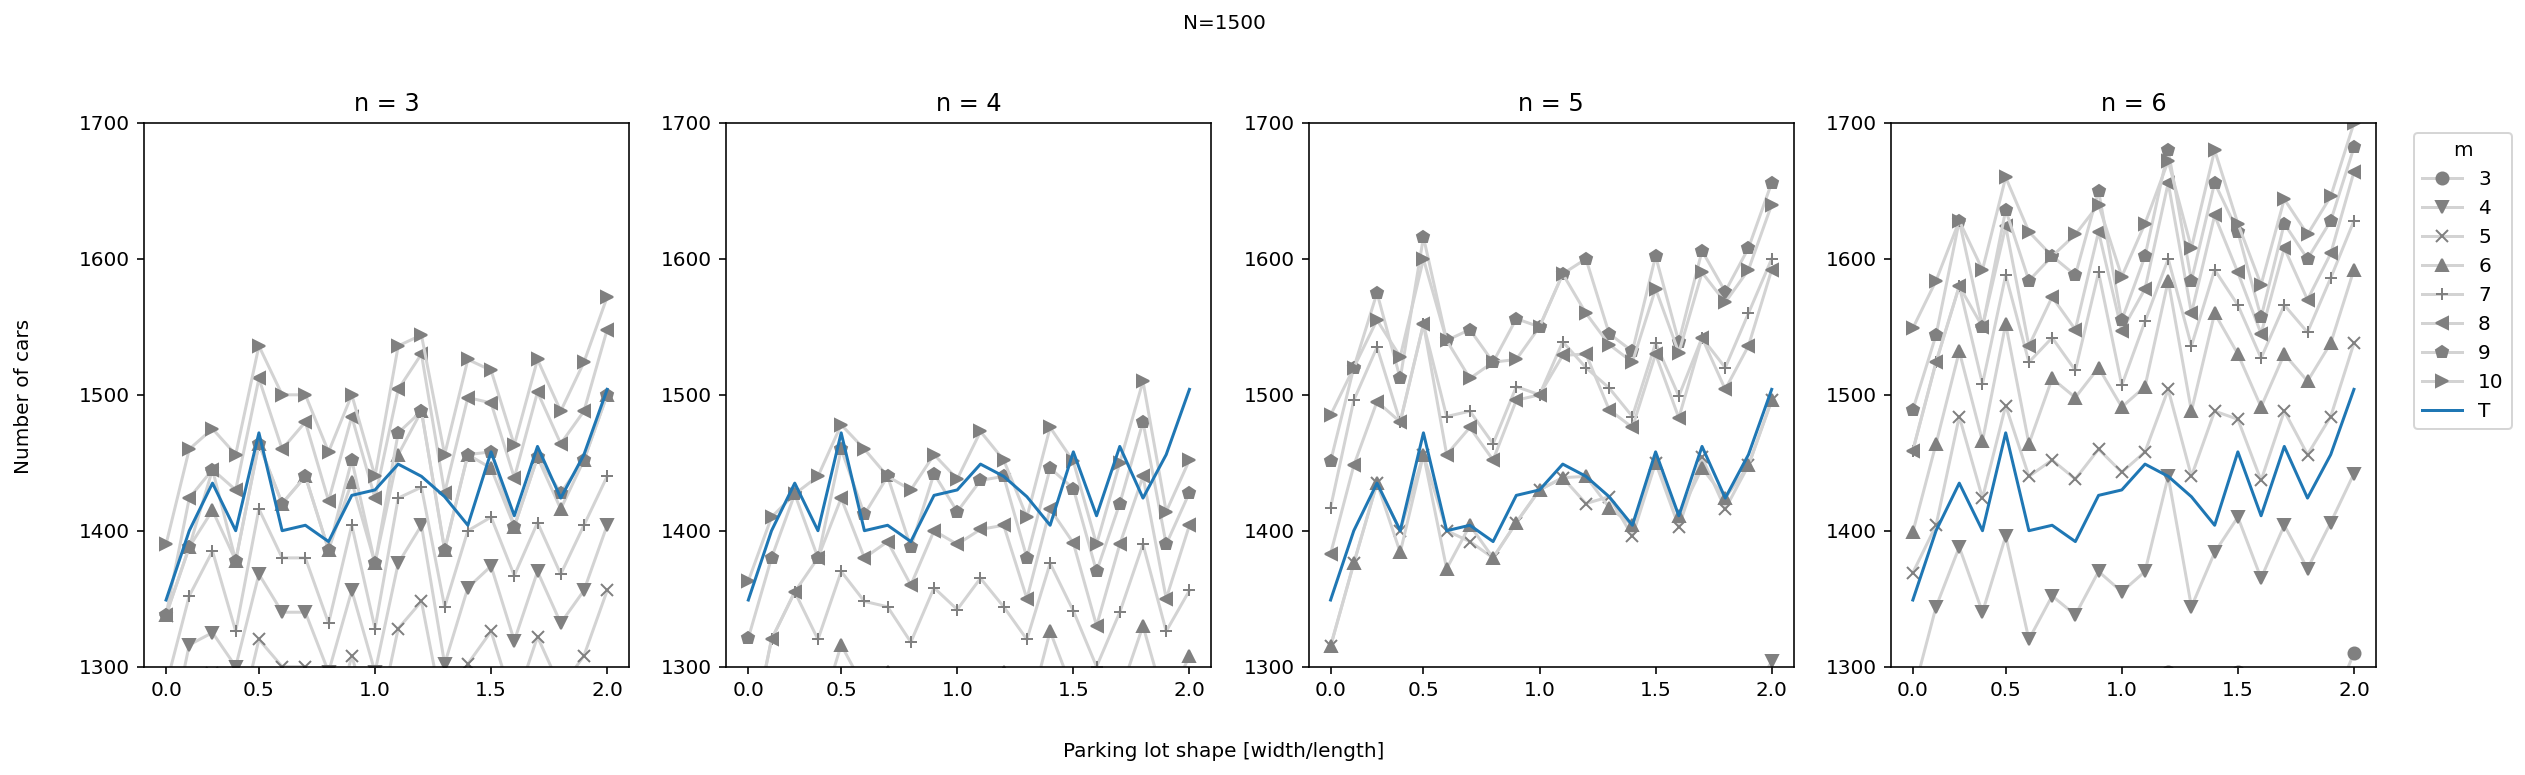

In [10]:
fig=plt.figure(figsize=(20,5))
N=1500
columns = 4
rows = 1
for i in range(1, 5):
    fig.add_subplot(rows, columns, i)
    #plt.plot(trd_lot, marker='x')
    indx=0
    for x in sub_lot_col[i-1][:-1]:
        plt.plot(x, color='lightgrey', marker=marker_list[indx], mec = 'gray', mfc = 'gray')
        indx += 1
    plt.plot(sub_lot_col[i-1][-1])
    #plt.xticks([0.0, 0.5, 1.0, 1.5, 2.0], ['0.0','0.5','1.0','1.5', '2.0'])
    plt.xticks([0.0, 4, 9, 14, 19], ['0.0','0.5','1.0','1.5', '2.0'])
    plt.ylim(N-200, N+200)
    y_ticks_values = [N-200, N-100, N, N+100, N+200]
    plt.yticks(y_ticks_values, y_ticks_values)
    plt.title('n = '+str(2+i))
plt.legend([x for x in range(3, 11)]+['T'], title = 'm', bbox_to_anchor=(1.3, 1))
fig.text(0.08, 0.5, 'Number of cars', va='center', rotation='vertical')
fig.text(0.5, 1.01 , 'N='+str(N), ha='center')
fig.text(0.5, 0.00 , 'Parking lot shape [width/length]', ha='center')
#plt.savefig('capacity_100.pdf', bbox_inches = "tight")
#plt.tight_layout()
plt.show()

## Retrieval results

In [11]:
%%time
rt_trad_val =[]
for width, length in new_shape.values():
    rt_trad_val.append(rt_trad(width, length))
rt_trad_val = np.array(rt_trad_val, dtype=object)

Wall time: 1h 49min 15s


In [12]:
%%time
sublot_rt =[]
for sublot_columns in cols:
    retr_time =[]
    for width, length in new_shape.values():
        retr_time.append(rt(width, length, sublot_columns, sublot_rows = 10))
    sublot_rt.append(np.array(retr_time, dtype=object))
sublot_rt.append(rt_trad_val)

Wall time: 11h 7min 47s


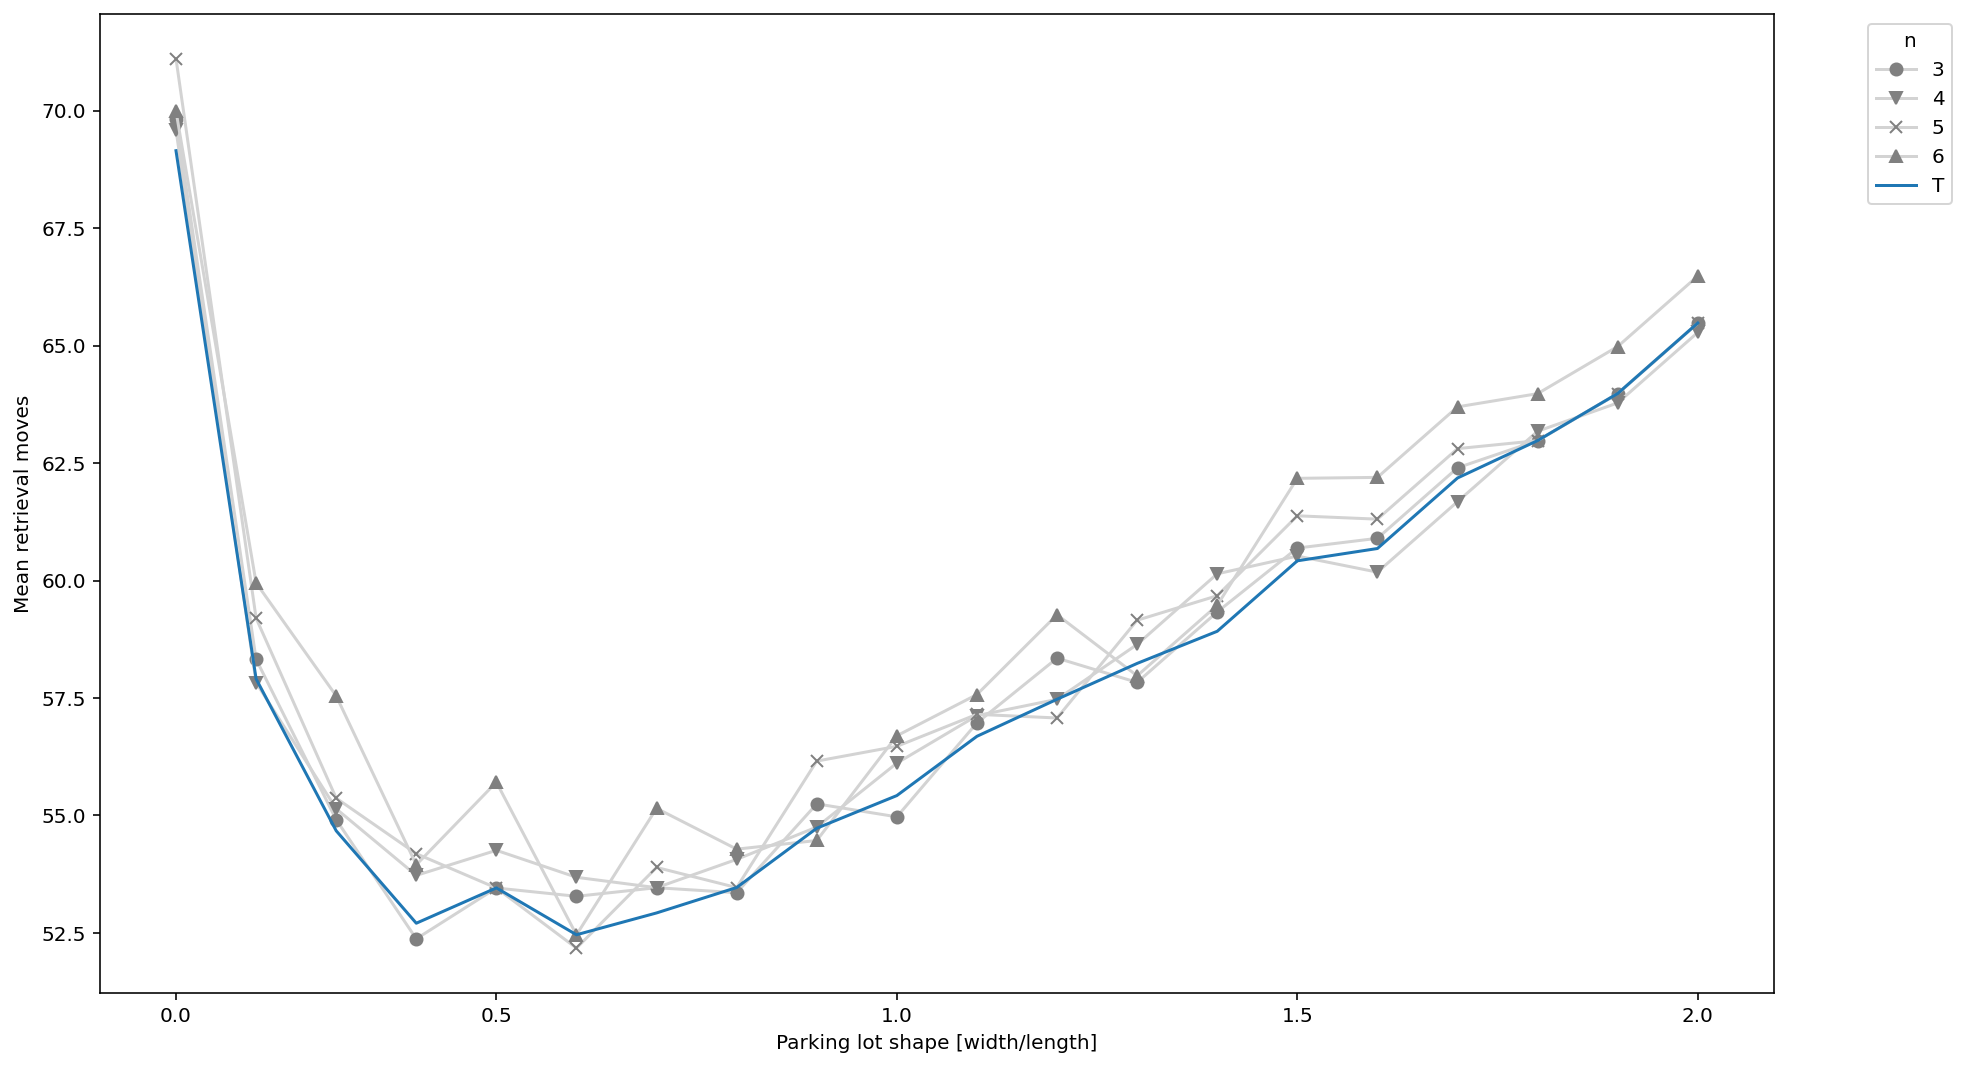

In [13]:
plt.figure(figsize=(15, 9))
plt.plot([np.mean(item) for item in sublot_rt[0]],  marker=marker_list[0], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[1]],  marker=marker_list[1], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[2]],  marker=marker_list[2], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[3]],  marker=marker_list[3], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[4]])
#plt.legend(labels=['m'+'x'+str(x) for x in sub_lots_cols],  loc="upper left", bbox_to_anchor=(1.05, 1))
#plt.xticks(list(range(len(new_shape.keys()))), new_shape.keys(), rotation=45)
plt.xticks([0.0, 4, 9, 14, 19], ['0.0','0.5','1.0','1.5', '2.0'])
plt.legend([x for x in range(3, 7)]+['T'], title = 'n', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Parking lot shape [width/length]')
plt.ylabel('Mean retrieval moves')
plt.show()

In [ ]:
save_path = "C:\\Users\\parag\\Dropbox (Personal)\\sub_lot_paper\\source_code\\"
save_results_data = save_results(new_shape, trd_lot, sub_lot_sizes, sublot_cars, rt_trad_val, sublot_rt, save_path, N)